In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
loan_data = pd.read_csv("LoanDataset - LoansDatasest.csv")
df = loan_data

In [3]:
# See Top ten itemns 
df.head(10)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,2,DEFAULT
6,7.0,26,77100,RENT,8.0,EDUCATION,A,"£35,000.00",12.42,10,NaN,3,NO DEFAULT
7,8.0,24,78956,RENT,5.0,MEDICAL,A,"£35,000.00",11.11,10,NaN,4,NO DEFAULT
8,9.0,24,83000,RENT,8.0,PERSONAL,A,"£35,000.00",8.90,10,NaN,2,NO DEFAULT
9,10.0,21,10000,OWN,6.0,VENTURE,C,"£1,600.00",14.74,1,N,3,DEFAULT


In [4]:
# Print object type and shape for DataFrames
print("df:", type(df))
print("df:", df.shape)
print()

df: <class 'pandas.core.frame.DataFrame'>
df: (32586, 13)



In [5]:
# View all the columns in the data set
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [6]:
# Information overview of the loan_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [7]:
# View the '"historical_default"' column 
df["historical_default"].unique()

array(['Y', nan, 'N'], dtype=object)

In [8]:
# Clean the '"historical_default"' column
df["historical_default"] = df["historical_default"].fillna("Not_available").replace({"Y": "Yes", "N": "No"})
df["historical_default"].head()

0              Yes
1    Not_available
2               No
3               No
4              Yes
Name: historical_default, dtype: object

In [9]:
# Check for missing values
loan_data.isnull().sum()

customer_id               3
customer_age              0
customer_income           0
home_ownership            0
employment_duration     895
loan_intent               0
loan_grade                0
loan_amnt                 1
loan_int_rate          3116
term_years                0
historical_default        0
cred_hist_length          0
Current_loan_status       4
dtype: int64

In [10]:
# impute the null values in the '"loan_int_rate"' column with the mean
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

In [11]:
# Drop the remaining null values in the dataframe
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31683 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          31683 non-null  float64
 1   customer_age         31683 non-null  int64  
 2   customer_income      31683 non-null  object 
 3   home_ownership       31683 non-null  object 
 4   employment_duration  31683 non-null  float64
 5   loan_intent          31683 non-null  object 
 6   loan_grade           31683 non-null  object 
 7   loan_amnt            31683 non-null  object 
 8   loan_int_rate        31683 non-null  float64
 9   term_years           31683 non-null  int64  
 10  historical_default   31683 non-null  object 
 11  cred_hist_length     31683 non-null  int64  
 12  Current_loan_status  31683 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.4+ MB


In [12]:
# Drop the unnecessary customer_id column
df.drop(columns="customer_id", inplace=True)
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Yes,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,Not_available,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,No,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,No,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Yes,4,DEFAULT


In [28]:
# Convert the '"loan_amnt"' column from a string(object) to numeric & '"customer_income"' to integer
df["loan_amnt"] = df["loan_amnt"].replace(",", "").replace("£", "").astype(float)
df["customer_income"] = df["customer_income"].str.replace(",", "").astype(int)
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Yes,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,Not_available,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,No,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,No,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Yes,4,DEFAULT


In [29]:
# Generate summary statistics for the columns of a DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31683.0,27.745352,6.373760,3.00,23.00,26.000000,30.00,144.00
customer_income,31683.0,66692.259445,62431.892148,4000.00,39331.50,56000.000000,80000.00,6000000.00
employment_duration,31683.0,4.790014,4.143099,0.00,2.00,4.000000,7.00,123.00
loan_amnt,31683.0,9832.517438,22057.313193,500.00,5000.00,8000.000000,12500.00,3500000.00
loan_int_rate,31683.0,11.036835,3.070376,5.42,8.49,11.011553,13.16,23.22
term_years,31683.0,4.770413,2.472167,1.00,3.00,4.000000,7.00,10.00
cred_hist_length,31683.0,5.808793,4.061198,2.00,3.00,4.000000,8.00,30.00


## Descriptive Statistics

In [30]:
# What is the average loan amount requested by customers?
df["loan_amnt"].mean().round(2)

9832.52

In [31]:
# What is the median customer income?
df["customer_income"].median()

56000.0

In [32]:
# What is the distribution of loan grades?
df["loan_grade"].value_counts()

A    15141
B     8835
C     4829
D     2578
E      300
Name: loan_grade, dtype: int64

In [33]:
# What is the average interest rate for loans?
df["loan_int_rate"].mean().round(2)

11.04

In [34]:
# What is the average credit history length(years) of customers?
df["cred_hist_length"].mean().round()

6.0

## Aggregations and Grouping

In [35]:
# What is the average loan amount by loan intent?
df.groupby("loan_intent")["loan_amnt"].mean().round(2)

loan_intent
DEBTCONSOLIDATION     9665.77
EDUCATION             9525.04
HOMEIMPROVEMENT      10447.95
MEDICAL               9684.58
PERSONAL             10292.63
VENTURE               9656.18
Name: loan_amnt, dtype: float64

In [36]:
# What is the average interest rate by home ownership status?
df.groupby("home_ownership")["loan_int_rate"].mean().round(2).reset_index()

,home_ownership,loan_int_rate
0,MORTGAGE,10.57
1,OTHER,11.91
2,OWN,10.97
3,RENT,11.42


In [37]:
# What is the average customer age by loan grade?
df.groupby("loan_grade")["customer_age"].mean().round().reset_index()

,loan_grade,customer_age
0,A,26.0
1,B,28.0
2,C,29.0
3,D,31.0
4,E,28.0


## Filtering and Conditional Queries

In [48]:
# What is the average income of customers who defaulted on their current loan?
defaulted_avg_income = df[df["Current_loan_status"] == 'DEFAULT']["customer_income"].mean().round()
defaulted_avg_income

49894.0

##  Correlation and Relationships

In [49]:
# Is there a correlation between customer income and loan amount?
df[["customer_income", "loan_amnt"]].corr()

,customer_income,loan_amnt
customer_income,1.000000,0.078442
loan_amnt,0.078442,1.000000


### Key Points:

- **Diagonal Values (1.000000)**:
  - The diagonal values are always `1` because each variable is perfectly correlated with itself.

- **Correlation between `customer_income` and `loan_amnt` (0.078442)**:
  - The value `0.078442` represents the Pearson correlation coefficient between `customer_income` and `loan_amnt`.

  **Interpretation**:
  - **Positive Correlation (0.078442)**: The correlation is positive, meaning as `customer_income` increases, `loan_amnt` tends to increase slightly as well, and vice versa.
  - **Weak Correlation**: The value is very close to `0`, indicating a very weak linear relationship between `customer_income` and `loan_amnt`. In practical terms, customer income and loan amount are almost independent of each other in your dataset, meaning changes in income are not strongly associated with changes in the loan amount.


# DATA VISUALIZATION 

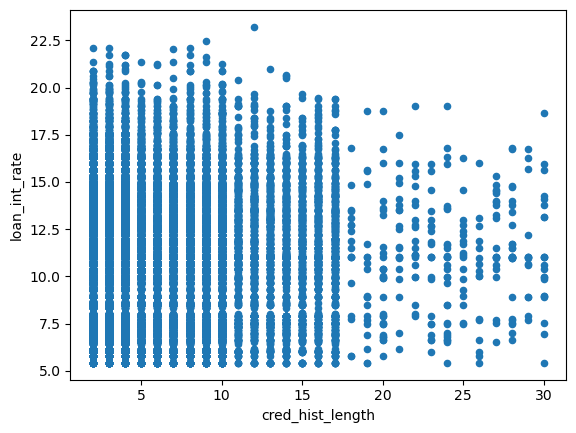

In [67]:
# Does the length of credit history affect the interest rate of loans?
df.plot.scatter(x="cred_hist_length", y="loan_int_rate")
plt.show()

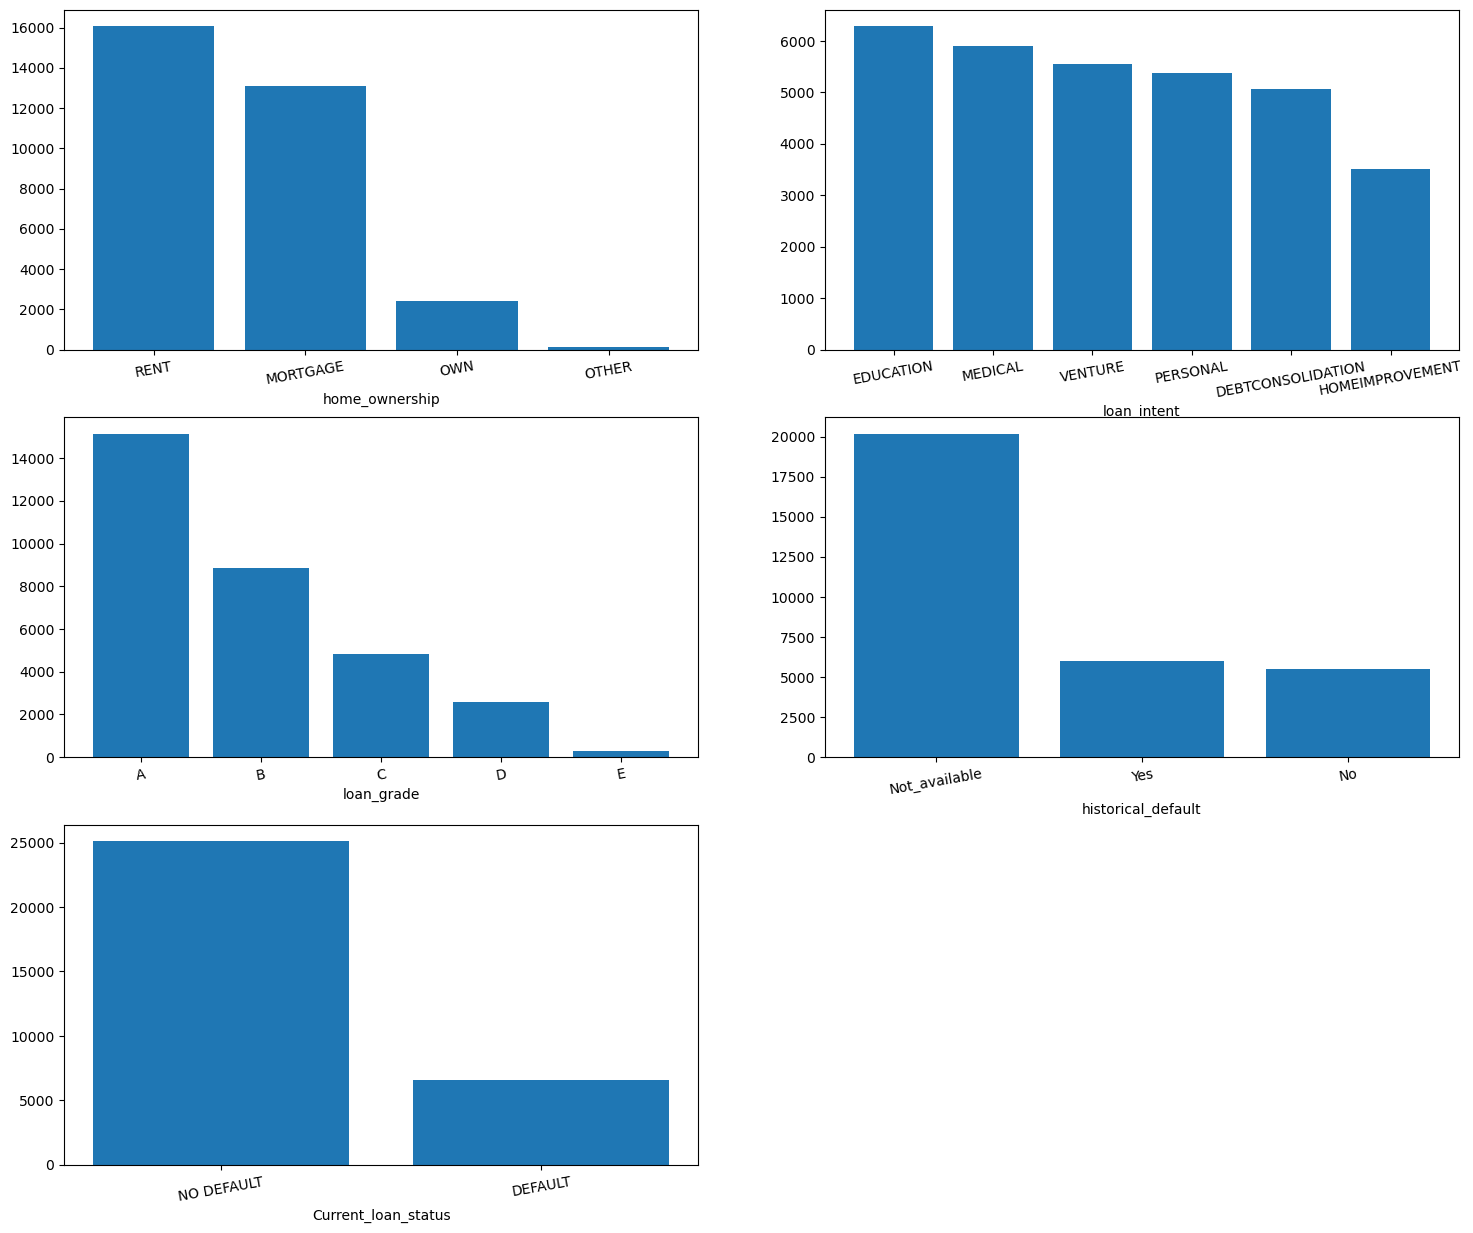

In [53]:
# sns.pairplot(numdf)
numdf=df.select_dtypes(exclude=object)
catdf=df.select_dtypes(include=object)
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(3,2,plot)
    value=catdf[column].value_counts(ascending=False)
    plt.bar(value.index, value.values)
    plt.xlabel(column)
    plt.xticks(rotation=10)
    plot+=1
plt.show()

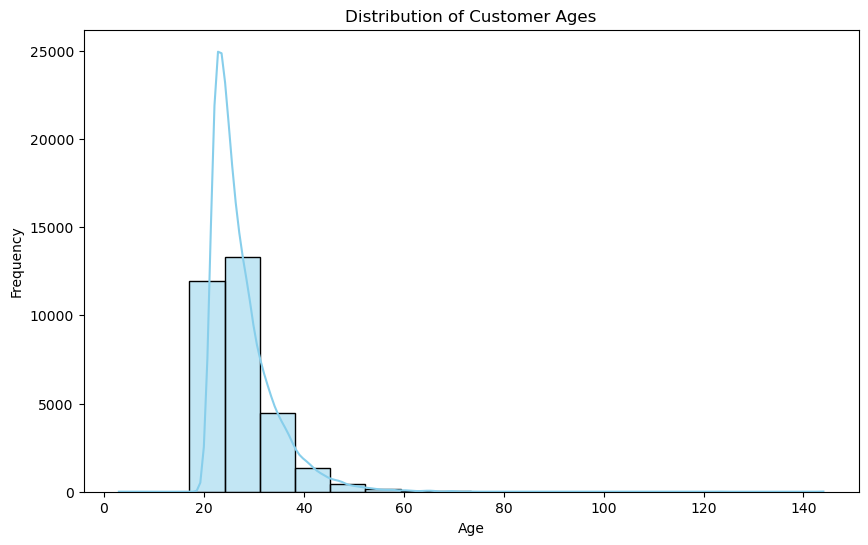

In [69]:
# What is the age distribution of customers in the dataset?
plt.figure(figsize=(10, 6))
sns.histplot(df["customer_age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

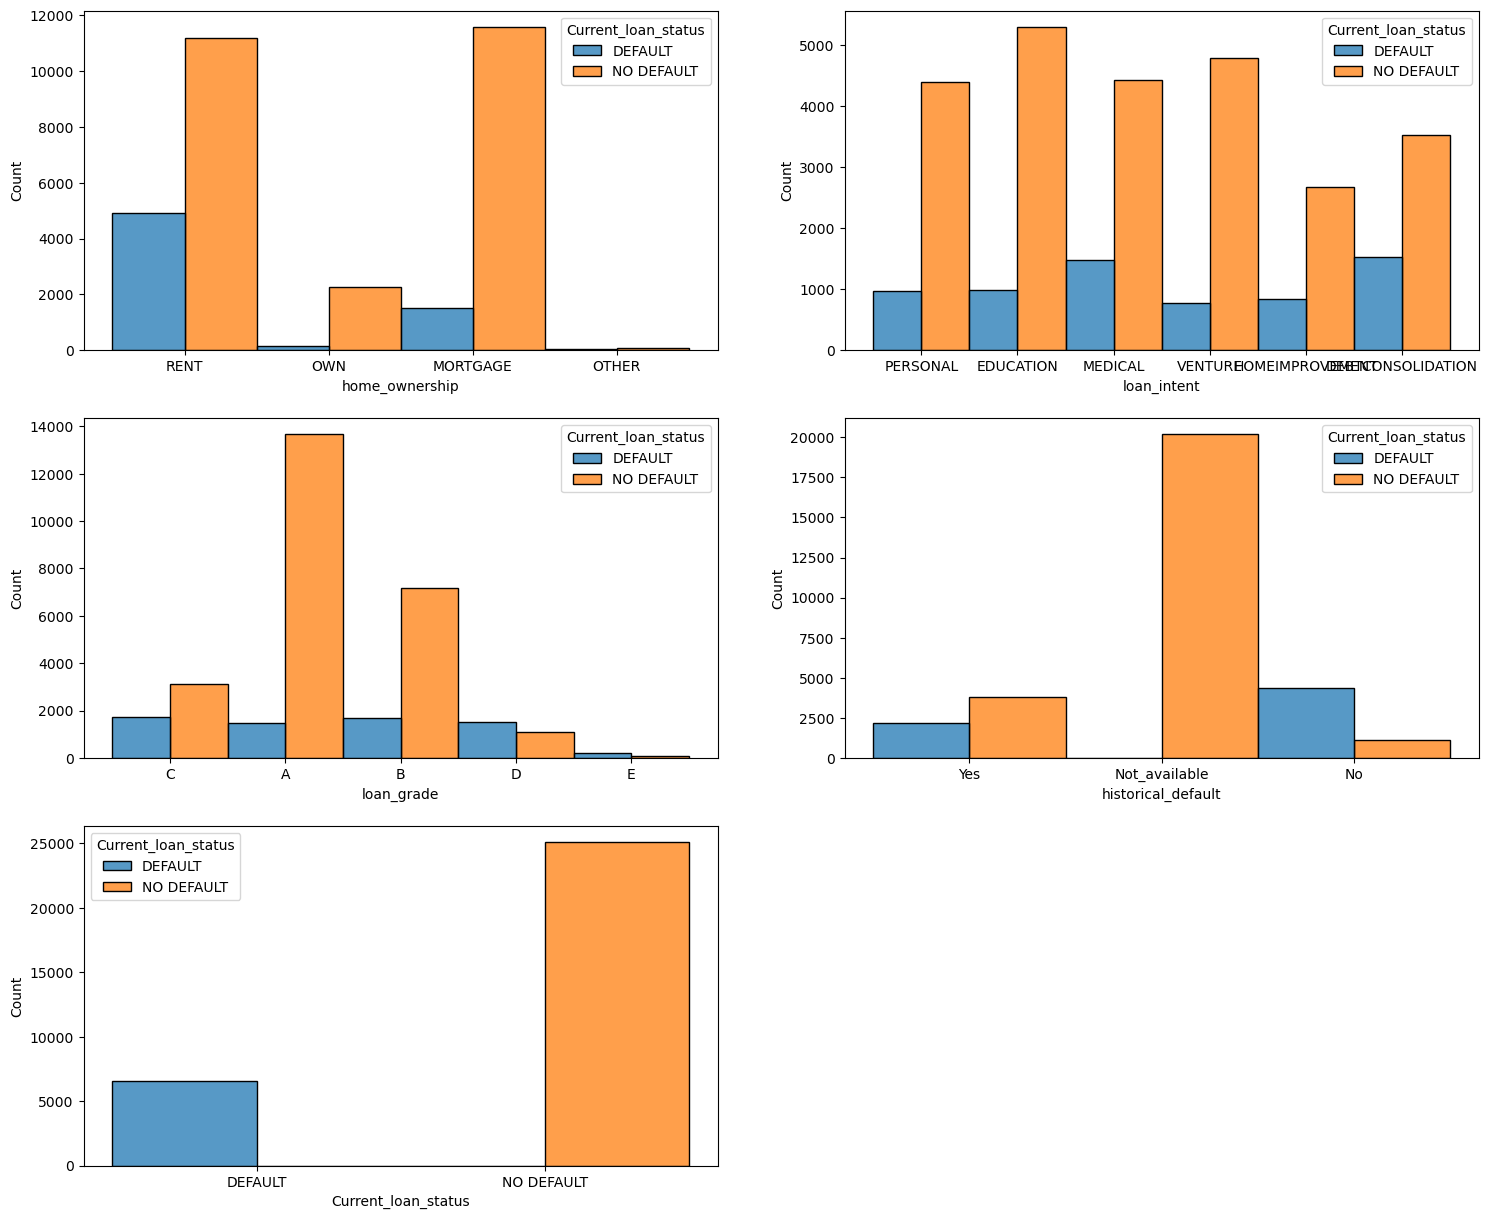

In [70]:
# what is the relationship between 'current_loan_status' & other variables?
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(3,2,plot)
    sns.histplot(catdf, x=column, hue="Current_loan_status", multiple="dodge")
    plot+=1
plt.show()


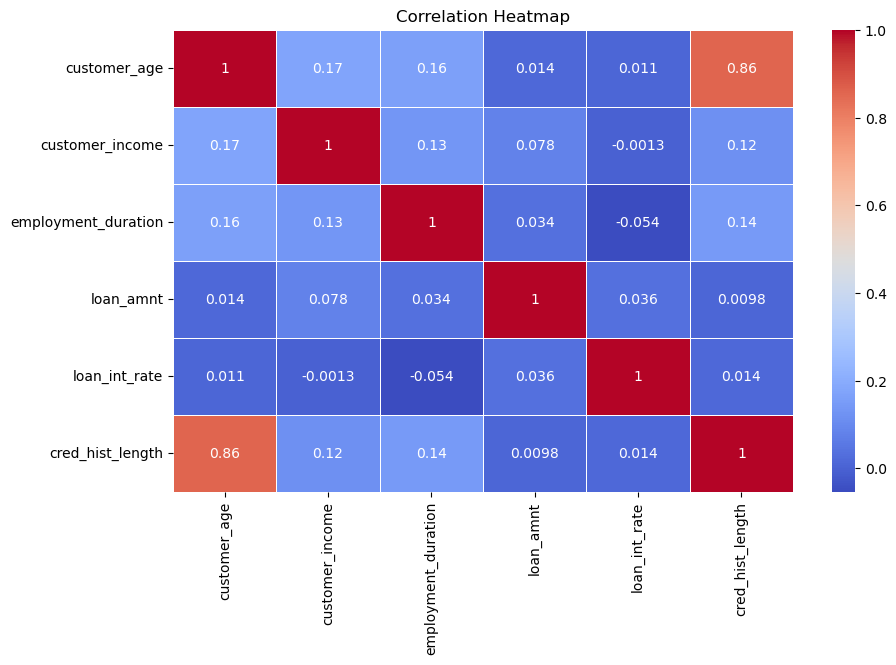

In [71]:
# What are the correlations between numeric variables?
plt.figure(figsize=(10, 6))
sns.heatmap(df[["customer_age", "customer_income", "employment_duration", "loan_amnt", "loan_int_rate", "cred_hist_length"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


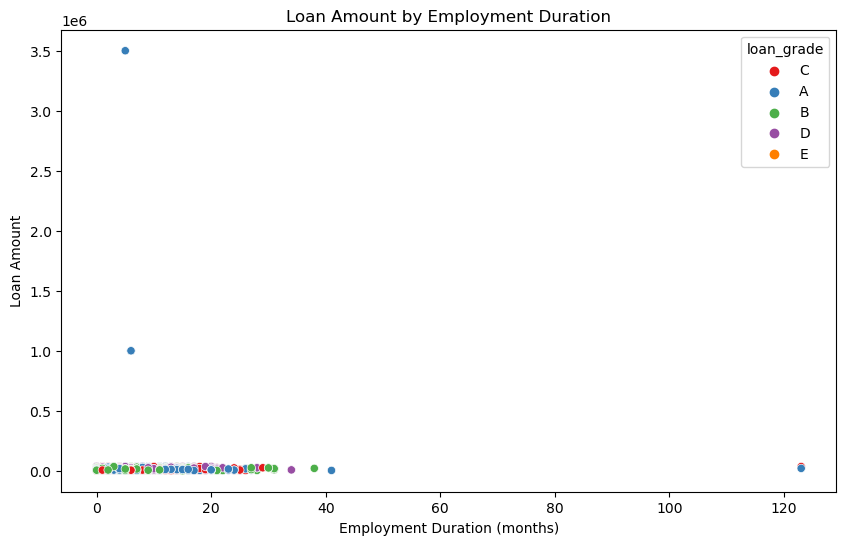

In [72]:
# How does the requested loan amount vary with the duration of employment?
plt.figure(figsize=(10, 6))
sns.scatterplot(x="employment_duration", y="loan_amnt", hue="loan_grade", data=df, palette="Set1")
plt.title("Loan Amount by Employment Duration")
plt.xlabel("Employment Duration (months)")
plt.ylabel("Loan Amount")
plt.show()




# Insights

1. people renting their homes account for the highest number of defaulters while people who own account for the least.
2. Education was the main reason why people took up loans and home improvement was the last reason.
3. Loan grade A was the most popular with the highest distribution of 15,141.
4. There were more people with a history of default compared to those who had not defaulted.
5. The current loan status data shows that there are fewer defaulters compared to non-defaulters.
6. The majority of our customer base falls within the age range of 20 to 40 years.